In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import time
import os
from os import listdir
from os.path import isfile,join
from matplotlib import pyplot as mp
import numpy.matlib as npm

In [2]:
def kneeValue(y):
    values=y.copy()
    #get coordinates of all the points
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T
    #np.array([range(nPoints), values])

    # get the first point
    firstPoint = allCoord[0]
    # get vector between first and last point - this is the line
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

    # find the distance from each point to the line:
    # vector between all points and first point
    vecFromFirst = allCoord - firstPoint

    # To calculate the distance to the line, we split vecFromFirst into two 
    # components, one that is parallel to the line and one that is perpendicular 
    # Then, we take the norm of the part that is perpendicular to the line and 
    # get the distance.
    # We find the vector parallel to the line by projecting vecFromFirst onto 
    # the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel
    # We project vecFromFirst by taking the scalar product of the vector with 
    # the unit vector that points in the direction of the line (this gives us 
    # the length of the projection of vecFromFirst onto the line). If we 
    # multiply the scalar product by the unit vector, we have vecFromFirstParallel
    scalarProduct = np.sum(vecFromFirst * npm.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel

    # distance to line is the norm of vecToLine
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

    # knee/elbow is the point with max distance value
    idxOfBestPoint = np.argmax(distToLine)

    #print ("Knee of the curve is at index =",idxOfBestPoint)
    #print ("Knee value =", values[idxOfBestPoint])
    return (values[idxOfBestPoint])

In [3]:
actualPredictionLabelsFolder = 'data/'
actualPredictionCsvFiles = [f for f in listdir(actualPredictionLabelsFolder) if (isfile(join(actualPredictionLabelsFolder, f)) and f.endswith('.csv')) ]

**************************************************
currentCsvLabelFile ::  msw_result.csv
currentCsvLabelFileFullPath ::  data/msw_result.csv
regressedDf.shape (134977, 23)
currentIndicatorKey MSW
doubtfulPercent: 46.04784518843951
nonDoubtfulPercent: 53.95215481156049
positiveSlopeNonDoubtfulPercent 13.084451425057603
zeroSlopeNonDoubtfulPercent 40.86770338650289
kneeStdErrValue 0.16495721976846453


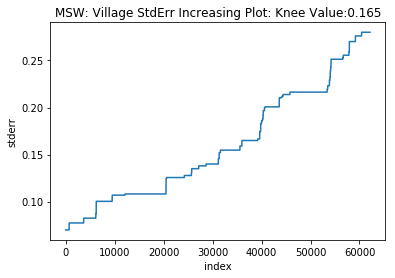

doubtfulDf_unsure_Percent 17.014750661223765
doubtfulDf_sure_negative_Percent 20.160471784081732
doubtfulDf_sure_nonnegative_Percent 8.872622743134015
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
**************************************************
currentCsvLabelFile ::  bf_result.csv
currentCsvLabelFileFullPath ::  data/bf_result.csv
regressedDf.shape (134977, 23)
currentIndicatorKey BF
doubtfulPercent: 24.829415381879876
nonDoubtfulPercent: 75.17058461812013
positiveSlopeNonDoubtfulPercent 5.966942516132378
zeroSlopeNonDoubtfulPercent 69.20364210198774
kneeStdErrValue 0.13997084244475302


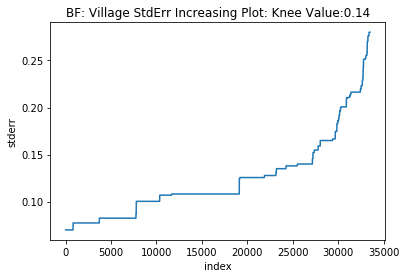

doubtfulDf_unsure_Percent 4.704505211999082
doubtfulDf_sure_negative_Percent 14.00683079339443
doubtfulDf_sure_nonnegative_Percent 6.118079376486365
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
**************************************************
currentCsvLabelFile ::  fc_result.csv
currentCsvLabelFileFullPath ::  data/fc_result.csv
regressedDf.shape (134977, 23)
currentIndicatorKey FC
doubtfulPercent: 28.278891959370856
nonDoubtfulPercent: 71.72110804062915
positiveSlopeNonDoubtfulPercent 11.967964912540655
zeroSlopeNonDoubtfulPercent 59.75314312808849
kneeStdErrValue 0.13997084244475302


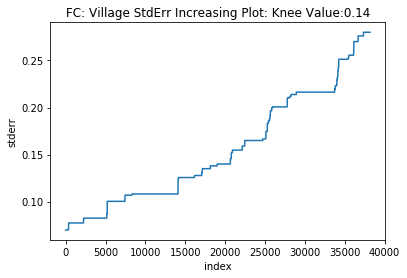

doubtfulDf_unsure_Percent 12.982211784229905
doubtfulDf_sure_negative_Percent 9.472724982774842
doubtfulDf_sure_nonnegative_Percent 5.823955192366107
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
**************************************************
currentCsvLabelFile ::  emp_result.csv
currentCsvLabelFileFullPath ::  data/emp_result.csv
regressedDf.shape (133439, 23)
currentIndicatorKey EMP
doubtfulPercent: 38.177744137770816
nonDoubtfulPercent: 61.822255862229184
positiveSlopeNonDoubtfulPercent 5.336520807260246
zeroSlopeNonDoubtfulPercent 56.485735054968934
kneeStdErrValue 0.16659862556700858


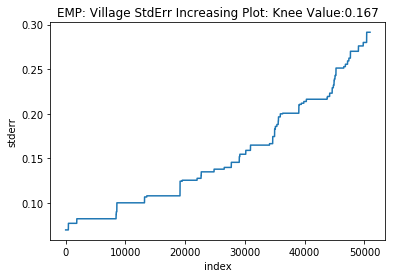

doubtfulDf_unsure_Percent 12.213820547216331
doubtfulDf_sure_negative_Percent 19.10535900299013
doubtfulDf_sure_nonnegative_Percent 6.858564587564355
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
**************************************************
currentCsvLabelFile ::  msl_result.csv
currentCsvLabelFileFullPath ::  data/msl_result.csv
regressedDf.shape (134977, 23)
currentIndicatorKey MSL
doubtfulPercent: 54.10255080495195
nonDoubtfulPercent: 45.89744919504805
positiveSlopeNonDoubtfulPercent 12.47619964882906
zeroSlopeNonDoubtfulPercent 33.42124954621899
kneeStdErrValue 0.13997084244475302


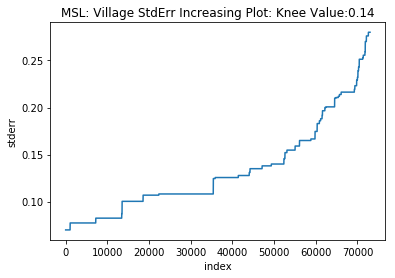

doubtfulDf_unsure_Percent 15.321128784904095
doubtfulDf_sure_negative_Percent 23.74478614875127
doubtfulDf_sure_nonnegative_Percent 15.03663587129659
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [5]:
doubtfulVillagesDictionary = {}
for currentCsvLabelFile in actualPredictionCsvFiles:
    print('*'*50)
    currentCsvLabelFileFullPath = actualPredictionLabelsFolder + currentCsvLabelFile
    print('currentCsvLabelFile :: ',currentCsvLabelFile)
    print('currentCsvLabelFileFullPath :: ',currentCsvLabelFileFullPath)
    df = pd.read_csv(currentCsvLabelFileFullPath)
    
    columnsPrediction=['predicted_2001','predicted_2003','predicted_2005','predicted_2007','predicted_2009','predicted_2011']
    subsetPredictionData=df[columnsPrediction]

    axisvalues=list(range(1,len(subsetPredictionData.columns)+1))
    def calc_slope(row):
        a = scipy.stats.linregress(axisvalues, y=row)
        return pd.Series(a._asdict())


    regressionData= (subsetPredictionData.apply(calc_slope,axis=1))
    regressedDf=pd.concat([df, regressionData], axis=1)
    print('regressedDf.shape',regressedDf.shape)
    
    underscoreStartIndex = currentCsvLabelFile.find('_')
    currentIndicatorKey = currentCsvLabelFile[:underscoreStartIndex].upper()
    print('currentIndicatorKey',currentIndicatorKey)
    regressedDf.to_csv(currentCsvLabelFileFullPath[:-4]+'_RegressedData.tsv',sep='\t',index=False)
    
    diffValues=subsetPredictionData.diff(axis=1)
    diffValues=diffValues.drop(['predicted_2001'],axis=1)
    doubtfulMask=[(np.any(zx<0)) for zx in diffValues.values]
    nonDoubtfulMask= [not av for av in doubtfulMask]
    totalVillages=len(doubtfulMask)
    doubtfulPercent = (np.sum(doubtfulMask)/totalVillages)*100
    nonDoubtfulPercent = (np.sum(nonDoubtfulMask)/totalVillages)*100
    print('doubtfulPercent:',doubtfulPercent)
    print('nonDoubtfulPercent:',nonDoubtfulPercent)
    positiveSlopeNonDoubtfulPercent = np.sum((regressedDf['slope'].values)[nonDoubtfulMask]>0)*100/totalVillages
    print('positiveSlopeNonDoubtfulPercent',positiveSlopeNonDoubtfulPercent)
    zeroSlopeNonDoubtfulPercent = np.sum((regressedDf['slope'].values)[nonDoubtfulMask]==0)*100/totalVillages
    print('zeroSlopeNonDoubtfulPercent',zeroSlopeNonDoubtfulPercent)
    # print(stdErrOfDoubtfulVillages.shape)
    positiveMask=regressedDf['slope']>0
    negativeMask=regressedDf['slope']<0
    positiveDoubtfulMask = doubtfulMask & positiveMask
    negativeDoubtfulMask = doubtfulMask & negativeMask

    plt.clf()
    stdErrOfDoubtfulVillages=(regressedDf)['stderr'].values[doubtfulMask]
    y = stdErrOfDoubtfulVillages.tolist()
    x = list(range(len(y)))
    y.sort() 
    plt.plot(x, y)
    kneeVal=kneeValue(y)
    print("kneeStdErrValue",kneeVal)
    plt.title(currentIndicatorKey+": Village StdErr Increasing Plot: Knee Value:"+str(round(kneeVal,3)))
    plt.ylabel('stderr')
    plt.xlabel('index')
    plt.show()
    doubtfulDf = regressedDf[doubtfulMask].copy()
    doubtfulDf_unsure = doubtfulDf[doubtfulDf['stderr']>kneeVal]
    doubtfulDf_sure = doubtfulDf[doubtfulDf['stderr']<=kneeVal]
    doubtfulDf_sure_negative = doubtfulDf_sure[doubtfulDf_sure['slope']<0]
    doubtfulDf_sure_postive = doubtfulDf_sure[doubtfulDf_sure['slope']>=0]
    print("doubtfulDf_unsure_Percent",(doubtfulDf_unsure.shape[0]*100/totalVillages))
    print("doubtfulDf_sure_negative_Percent",(doubtfulDf_sure_negative.shape[0]*100/totalVillages))
    print("doubtfulDf_sure_nonnegative_Percent",(doubtfulDf_sure_postive.shape[0]*100/totalVillages))
    print("$"*50)